# CSE572 Project 3 - Cluster Validation Project

Mark Khusid

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap

from scipy.integrate import simpson

from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

## Load the datasets

In [2]:
insulin_data = pd.read_csv('InsulinData.csv', low_memory=False)
cgm_data = pd.read_csv('CGMData.csv', low_memory=False)

## View Dataframes

In [3]:
insulin_data

,Index,Date,Time,New Device Time,BG Reading (mg/dL),Linked BG Meter ID,Basal Rate (U/h),Temp Basal Amount,Temp Basal Type,Temp Basal Duration (h:mm:ss),...,Scroll Step Size,Insulin Action Curve Time,Sensor Calibration Rejected Reason,Preset Bolus,Bolus Source,Network Device Associated Reason,Network Device Disassociated Reason,Network Device Disconnected Reason,Sensor Exception,Preset Temp Basal Name
0,0,2/12/2018,13:20:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,TEMPORARY,NaN,NaN,NaN,NaN
1,1,2/12/2018,13:20:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2/12/2018,13:18:48,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2/12/2018,13:18:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2/12/2018,13:12:33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,CLOSED_LOOP_MICRO_BOLUS,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41430,22135,7/24/2017,19:00:01,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41431,22136,7/24/2017,18:59:44,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41432,22137,7/24/2017,18:59:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41433,22138,7/24/2017,18:59:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#insulin_data['BWZ Carb Input (grams)']

In [5]:
cgm_data

,Index,Date,Time,New Device Time,BG Reading (mg/dL),Linked BG Meter ID,Basal Rate (U/h),Temp Basal Amount,Temp Basal Type,Temp Basal Duration (h:mm:ss),...,Scroll Step Size,Insulin Action Curve Time,Sensor Calibration Rejected Reason,Preset Bolus,Bolus Source,Network Device Associated Reason,Network Device Disassociated Reason,Network Device Disconnected Reason,Sensor Exception,Preset Temp Basal Name
0,20355,2/12/2018,13:22:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20356,2/12/2018,13:17:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20357,2/12/2018,13:12:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SENSOR_ERROR,NaN
3,20358,2/12/2018,13:07:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SENSOR_ERROR,NaN
4,20359,2/12/2018,13:02:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SENSOR_ERROR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55338,52855,7/25/2017,12:28:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55339,52856,7/25/2017,12:23:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55340,52857,7/25/2017,12:18:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55341,52858,7/25/2017,12:13:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA on dataframes

In [6]:
#insulin_data.info()

In [7]:
cgm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55343 entries, 0 to 55342
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Index                                55343 non-null  int64  
 1   Date                                 55343 non-null  object 
 2   Time                                 55343 non-null  object 
 3   New Device Time                      0 non-null      float64
 4   BG Reading (mg/dL)                   0 non-null      float64
 5   Linked BG Meter ID                   0 non-null      float64
 6   Basal Rate (U/h)                     0 non-null      float64
 7   Temp Basal Amount                    0 non-null      float64
 8   Temp Basal Type                      0 non-null      float64
 9   Temp Basal Duration (h:mm:ss)        0 non-null      float64
 10  Bolus Type                           0 non-null      float64
 11  Bolus Volume Selected (U)   

## Convert 'Date' and 'Time' columns to datetime format in both datasets for easier manipulation

In [8]:
def preprocess_date(date_string):
    date_string = date_string.strip()
    if len(date_string.split()) == 1:
        return date_string
    elif len(date_string.split()) == 2:
        return date_string.split()[0]

In [9]:
insulin_data['Date'] = insulin_data['Date'].apply(preprocess_date)

In [10]:
insulin_data['datetime'] = pd.to_datetime(insulin_data['Date'] + ' ' + insulin_data['Time'])

cgm_data['datetime'] = pd.to_datetime(cgm_data['Date'] + ' ' + cgm_data['Time'])

In [11]:
insulin_data[['Date', 'Time', 'datetime']]

,Date,Time,datetime
0,2/12/2018,13:20:53,2018-02-12 13:20:53
1,2/12/2018,13:20:48,2018-02-12 13:20:48
2,2/12/2018,13:18:48,2018-02-12 13:18:48
3,2/12/2018,13:18:48,2018-02-12 13:18:48
4,2/12/2018,13:12:33,2018-02-12 13:12:33
...,...,...,...
41430,7/24/2017,19:00:01,2017-07-24 19:00:01
41431,7/24/2017,18:59:44,2017-07-24 18:59:44
41432,7/24/2017,18:59:44,2017-07-24 18:59:44
41433,7/24/2017,18:59:44,2017-07-24 18:59:44


In [12]:
cgm_data[['Date', 'Time', 'datetime']]

,Date,Time,datetime
0,2/12/2018,13:22:27,2018-02-12 13:22:27
1,2/12/2018,13:17:27,2018-02-12 13:17:27
2,2/12/2018,13:12:27,2018-02-12 13:12:27
3,2/12/2018,13:07:27,2018-02-12 13:07:27
4,2/12/2018,13:02:27,2018-02-12 13:02:27
...,...,...,...
55338,7/25/2017,12:28:54,2017-07-25 12:28:54
55339,7/25/2017,12:23:54,2017-07-25 12:23:54
55340,7/25/2017,12:18:54,2017-07-25 12:18:54
55341,7/25/2017,12:13:54,2017-07-25 12:13:54


## Search for non-zero BMZ Carb Input Data

In [13]:
# This datetime series contains the start of all non NaN and  positive carb input
# data from the column BWZ Carb Input (grams)
meal_times = \
    insulin_data[~insulin_data['BWZ Carb Input (grams)'].isna() & \
    (insulin_data['BWZ Carb Input (grams)'] > 0)]['datetime']
meal_times

48      2018-02-12 09:15:45
129     2018-02-12 02:30:55
188     2018-02-11 20:33:18
207     2018-02-11 18:14:37
222     2018-02-11 16:27:04
                ...        
41265   2017-07-26 11:24:52
41274   2017-07-26 09:27:16
41347   2017-07-25 18:31:40
41393   2017-07-25 10:39:46
41401   2017-07-25 10:21:19
Name: datetime, Length: 747, dtype: datetime64[ns]

In [14]:
meal_times.index

Index([   48,   129,   188,   207,   222,   235,   261,   300,   432,   486,
       ...
       41139, 41164, 41172, 41214, 41261, 41265, 41274, 41347, 41393, 41401],
      dtype='int64', length=747)

## Extract Meal Carb Data

### Obtain Carb Data At Meal Times

In [15]:
meal_carb_data = []

for i in meal_times.index:
    meal_carb_data.append(insulin_data['BWZ Carb Input (grams)'].iloc[i])

In [16]:
len(meal_carb_data)

747

In [17]:
meal_carb_data[0:10]

[np.float64(34.0),
 np.float64(15.0),
 np.float64(71.0),
 np.float64(8.0),
 np.float64(40.0),
 np.float64(9.0),
 np.float64(27.0),
 np.float64(10.0),
 np.float64(40.0),
 np.float64(90.0)]

In [18]:
len(meal_carb_data)

747

## Bin Calculations

### Obtain Max and Min Meal Carbs

In [19]:
max_meal_carbs = np.max(meal_carb_data)
max_meal_carbs

np.float64(129.0)

In [20]:
min_meal_carbs = np.min(meal_carb_data)
min_meal_carbs

np.float64(3.0)

### Calculate Number of Bins

In [21]:
bin_size = 20 # grams

number_of_bins = int(np.round(((max_meal_carbs - min_meal_carbs) / bin_size), decimals = 0))
number_of_bins

6

### Create Bins

In [22]:
# Create 6 bins in the range of the data
bin_boundaries = np.linspace(min_meal_carbs, max_meal_carbs, 6) 
print("Bin boundaries:", bin_boundaries)

Bin boundaries: [  3.   28.2  53.4  78.6 103.8 129. ]


## Extract Meal Glucose Data

### Obtain CGM Data based on Length of After-Meal Window

In [23]:
# Initialize meal data list
meal_glucose_data = []
meal_carb_for_analysis_data = []

# Loop through each meal start time
for index, meal_time in meal_times.items():
    # A meal windows is 2 hours long
    meal_window = insulin_data[(insulin_data['datetime'] > meal_time) & 
                               (insulin_data['datetime'] <= (meal_time + pd.Timedelta(hours=2)))]
    #print(meal_window)

    # If that meal window is empty, get corresponding CGM_
    # data that starts at tm-30 and ends at tm+2hrs
    if meal_window.empty:
        # Step 4 condition (a): No meal between tm and tm+2hrs, use this stretch as meal data
        meal_cgm_data = cgm_data[(cgm_data['datetime'] >= (meal_time - pd.Timedelta(minutes=30))) & 
                                 (cgm_data['datetime'] <= (meal_time + pd.Timedelta(hours=2)))]
    else:
        # Step 4 check for condition (b) or (c)
        next_meal_time = meal_window.iloc[0]['datetime']
        if next_meal_time < (meal_time + pd.Timedelta(hours=2)):
            # condition (b): There is a meal at tp between tm and tm+2hrs, use tp data
            meal_time = next_meal_time
            meal_cgm_data = cgm_data[(cgm_data['datetime'] >= (meal_time - pd.Timedelta(minutes=30))) & 
                                     (cgm_data['datetime'] <= (meal_time + pd.Timedelta(hours=2)))]
        # Condition (c): There is a meal exactly at tm+2hrs, use tm+1hr 30min to tm+4hrs
        elif next_meal_time == (meal_time + pd.Timedelta(hours=2)):
            meal_cgm_data = cgm_data[(cgm_data['datetime'] >= (meal_time + pd.Timedelta(hours=1, minutes=30))) & 
                                     (cgm_data['datetime'] <= (meal_time + pd.Timedelta(hours=4)))]

    # Check if the extracted data has the correct number of points (30 for meal data)
    if len(meal_cgm_data) == 30:
        #print(f"Meal Time Data {meal_time} has {len(meal_cgm_data)} number of points.")
        meal_glucose_data.append(meal_cgm_data['Sensor Glucose (mg/dL)'].values)
        meal_carb_for_analysis_data.append(insulin_data['BWZ Carb Input (grams)'].iloc[index])

### Get Length of Meal Data CGM Values

In [24]:
len(meal_glucose_data)

715

In [25]:
len(meal_carb_for_analysis_data)

715

## Assign Each Meal to a Bin

In [26]:
meal_bin_indices = np.digitize(meal_carb_for_analysis_data, bin_boundaries, right=False)
meal_bin_indices = meal_bin_indices - 1
print("Bin indices:", meal_bin_indices)

Bin indices: [1 0 2 0 1 0 0 1 3 2 0 2 0 1 1 1 0 0 0 2 1 1 0 2 1 1 1 0 1 0 0 0 1 0 2 3 0
 2 0 0 0 0 3 0 2 0 3 0 0 1 0 2 0 0 0 0 0 0 1 0 1 0 0 2 0 1 0 0 0 0 0 1 0 1
 1 1 3 1 0 1 1 1 0 1 2 1 1 0 0 1 0 0 1 1 2 1 1 1 0 3 0 0 1 1 0 0 2 1 1 0 0
 0 1 1 0 1 0 1 0 2 0 1 1 0 1 1 0 0 0 1 1 0 1 0 3 0 1 0 1 0 1 0 1 0 3 0 2 1
 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 3 0 0 3 0 1 0 0 1 2 0 0 2 0 0 1 0 0 1 0 0
 1 2 0 1 0 0 0 0 0 2 0 2 0 0 1 0 1 1 0 0 3 0 0 0 0 0 0 3 3 1 2 0 0 2 0 0 1
 2 0 2 0 0 1 0 2 0 0 0 0 0 2 0 0 1 0 1 0 2 0 3 0 2 1 1 0 0 2 0 2 2 0 0 1 0
 1 1 0 1 0 1 0 0 1 1 2 1 0 1 2 2 0 1 3 1 0 3 0 1 2 0 1 0 1 2 0 0 0 0 0 0 0
 0 3 0 0 2 0 1 2 0 2 0 0 2 2 4 0 2 1 1 0 2 1 2 1 0 0 2 2 1 0 0 0 1 2 0 1 0
 2 2 0 0 1 2 0 0 0 0 2 0 0 0 0 1 1 3 0 3 2 0 0 1 1 0 2 1 2 0 3 0 0 1 2 0 0
 0 1 0 0 0 1 0 0 1 2 1 1 2 0 1 1 0 2 1 0 1 3 1 0 1 2 0 0 1 0 1 0 0 1 0 3 0
 0 0 0 2 0 1 2 3 1 3 2 1 2 0 3 0 0 0 0 2 0 0 3 3 0 0 1 1 0 2 0 2 2 0 1 2 2
 2 0 2 2 2 0 2 2 2 1 0 0 2 0 2 2 2 2 2 2 0 0 1 1 1 0 3 0 2 1 0 2 1 2 2 1 1
 0 1 0 0 1 1

In [27]:
len(meal_bin_indices)

715

In [28]:
min(meal_bin_indices)

np.int64(0)

In [29]:
max(meal_bin_indices)

np.int64(5)

### Create Meal Data Matrix

In [30]:
meal_data_matrix = np.vstack(meal_glucose_data)
meal_data_matrix

array([[ nan,  nan, 124., ..., 178., 184., 185.],
       [121., 120., 115., ...,  86.,  84.,  80.],
       [287., 288., 289., ..., 201., 189., 162.],
       ...,
       [274., 278., 283., ..., 268., 281., 292.],
       [223., 222., 222., ..., 324., 326., 328.],
       [ 82.,  85.,  92., ..., 164., 163., 155.]])

In [31]:
meal_data_matrix.shape

(715, 30)

## Handle Missing Data

We will use a strategy of deleting rows of data that have more than 10% of bad data.  If less than 10%, we will use KNN with a nearest neighbor hyperparameter (K=7).

### Define Threshold for Dumping Data

In [32]:
# 10%
dump_thresold = 0.1

### Create KNN Imputer

In [33]:
knn_imputer = KNNImputer(n_neighbors=7)

### Parse Meal Data and Handle Missing Values

In [34]:
cleaned_meal_glucose_data = []
cleaned_meal_bin_indices = []
cleaned_meal_carb_for_analysis_data = []

for index, row in enumerate(meal_data_matrix):
    
    proportion_missing_data = np.isnan(row).mean()

    if proportion_missing_data > dump_thresold:

        # Ignore this row
        #print(f"Ignoring row with {proportion_missing_data*100:.2f}% missing data")
        continue

    else:
        # The data is good, use it
        cleaned_meal_glucose_data.append(row)
        cleaned_meal_carb_for_analysis_data.append(meal_carb_for_analysis_data[index])
        cleaned_meal_bin_indices.append(meal_bin_indices[index])

In [35]:
len(cleaned_meal_glucose_data)

619

In [36]:
len(cleaned_meal_bin_indices)

619

### Convert Cleaned Meal Glucose Data List into a Matrix

In [37]:
cleaned_meal_glucose_data_matrix = \
    np.array(cleaned_meal_glucose_data)

In [38]:
cleaned_meal_glucose_data_matrix.shape

(619, 30)

### Use KNN to Impute NaNs in Cleaned Meal Data

In [39]:
cleaned_imputed_meal_glucose_data_matrix = \
    knn_imputer.fit_transform(cleaned_meal_glucose_data_matrix)

In [40]:
#cleaned_imputed_meal_glucose_data_matrix[0]

## Feature Extraction

### Define Feature Extractor Helper Functions

In [41]:
def compute_first_derivative(glucose_data, delta_t=5):
    return np.diff(glucose_data) / delta_t

In [42]:
def compute_second_derivative(glucose_values, delta_t=5):
    second_derivative = np.zeros(len(glucose_values) - 2)
    for i in range(1, len(glucose_values) - 1):
        second_derivative[i - 1] = \
            (glucose_values[i + 1] - 2 * glucose_values[i] + glucose_values[i - 1]) / (delta_t ** 2)
    return second_derivative

In [43]:
def compute_AUC(glucose_values, delta_t=5):
    return simpson(glucose_values, dx=delta_t)

### Define Feature Extractor Function

In [44]:
def feature_extractor(data_matrix):

    features = []

    for row in data_matrix:
        mean_glucose = np.mean(row)
        std_glucose  = np.std(row)
        max_glucose  = np.max(row)
        min_glucose  = np.min(row)
        
        first_derivative = compute_first_derivative(row)
        mean_first_derivate = np.mean(first_derivative)

        if len(row) > 2:
            second_derivative = compute_second_derivative(row)
            mean_second_derivative = np.mean(second_derivative)
        else:
            mean_second_derivative = 0

        AUC = compute_AUC(row)

        time_to_peak = np.argmax(row)

        features_vector = [
            mean_glucose,
            std_glucose,
            max_glucose,
            min_glucose,
            mean_first_derivate,
            mean_second_derivative,
            AUC,
            time_to_peak
        ]

        features.append(features_vector)
    
    return np.array(features)

### Get Feature Matrix for Cleaned Imputed Meal Data

In [45]:
meal_glucose_features_matrix = \
    feature_extractor(cleaned_imputed_meal_glucose_data_matrix)
#len(meal_gluxose_features_matrix[0])

In [46]:
len(cleaned_imputed_meal_glucose_data_matrix)

619

In [47]:
len(meal_glucose_features_matrix)

619

In [48]:
len(cleaned_meal_carb_for_analysis_data)

619

In [49]:
len(cleaned_meal_bin_indices)

619

In [50]:
cleaned_meal_carb_for_analysis_data[0:5]

[np.float64(15.0),
 np.float64(71.0),
 np.float64(8.0),
 np.float64(10.0),
 np.float64(40.0)]

In [51]:
cleaned_meal_bin_indices[0:5]

[np.int64(0), np.int64(2), np.int64(0), np.int64(0), np.int64(1)]

### Normalize the Feature Matrix

In [52]:
scaler = StandardScaler()
scaled_meal_glucose_features_matrix = \
    scaler.fit_transform(meal_glucose_features_matrix)

In [53]:
meal_glucose_features_matrix[0:5]

array([[ 8.98190476e+01,  1.91175360e+01,  1.31000000e+02,
         4.90000000e+01, -2.82758621e-01, -4.28571429e-03,
         1.30310714e+04,  9.00000000e+00],
       [ 2.14033333e+02,  4.45903452e+01,  2.89000000e+02,
         1.53000000e+02, -8.62068966e-01, -4.00000000e-02,
         3.10037500e+04,  2.00000000e+00],
       [ 1.46833333e+02,  2.61484013e+01,  1.89000000e+02,
         1.00000000e+02, -2.89655172e-01,  5.28571429e-02,
         2.11329167e+04,  0.00000000e+00],
       [ 2.01700000e+02,  1.21714146e+01,  2.21000000e+02,
         1.77000000e+02,  1.51724138e-01,  1.85714286e-02,
         2.92870833e+04,  1.80000000e+01],
       [ 8.82000000e+01,  3.36426317e+01,  1.69000000e+02,
         5.90000000e+01,  6.13793103e-01, -4.28571429e-03,
         1.26495833e+04,  2.80000000e+01]])

In [54]:
scaled_meal_glucose_features_matrix[0:5]

array([[-1.35358146, -0.64438944, -1.34072717, -1.28537305, -0.95960069,
        -0.264903  , -1.34238262, -0.8852873 ],
       [ 0.90939359,  0.73923035,  1.18551723,  0.73417365, -1.97024273,
        -2.54215225,  0.89878287, -1.54257823],
       [-0.31487721, -0.26249029, -0.41337163, -0.29501842, -0.97163214,
         3.37869579, -0.33209493, -1.73037564],
       [ 0.68470103, -1.02168552,  0.09827281,  1.20022289, -0.20161916,
         1.19253652,  0.68471716, -0.04019896],
       [-1.38307778,  0.14457771, -0.7331494 , -1.09118587,  0.60448818,
        -0.264903  , -1.3899536 ,  0.89878808]])

## Cluster the Data

### Convert Bins List into a Column Matrix

In [55]:
meal_bin_indices_column_vector = \
    np.array(cleaned_meal_bin_indices).reshape(-1, 1)

In [56]:
meal_bin_indices_column_vector[0:5]

array([[0],
       [2],
       [0],
       [0],
       [1]])

### Add Bin Data to Feature Data

In [57]:
#combined_feature_bin_data = \
#    np.hstack((meal_gluxose_features_matrix, meal_bin_indices_column_vector))
combined_feature_bin_data = meal_glucose_features_matrix
#combined_feature_bin_data = scaled_meal_glucose_features_matrix

In [58]:
combined_feature_bin_data[0:5]

array([[ 8.98190476e+01,  1.91175360e+01,  1.31000000e+02,
         4.90000000e+01, -2.82758621e-01, -4.28571429e-03,
         1.30310714e+04,  9.00000000e+00],
       [ 2.14033333e+02,  4.45903452e+01,  2.89000000e+02,
         1.53000000e+02, -8.62068966e-01, -4.00000000e-02,
         3.10037500e+04,  2.00000000e+00],
       [ 1.46833333e+02,  2.61484013e+01,  1.89000000e+02,
         1.00000000e+02, -2.89655172e-01,  5.28571429e-02,
         2.11329167e+04,  0.00000000e+00],
       [ 2.01700000e+02,  1.21714146e+01,  2.21000000e+02,
         1.77000000e+02,  1.51724138e-01,  1.85714286e-02,
         2.92870833e+04,  1.80000000e+01],
       [ 8.82000000e+01,  3.36426317e+01,  1.69000000e+02,
         5.90000000e+01,  6.13793103e-01, -4.28571429e-03,
         1.26495833e+04,  2.80000000e+01]])

### K-Means Clustering

In [59]:
number_of_bins

6

In [60]:
cleaned_meal_bin_indices[0:5]

[np.int64(0), np.int64(2), np.int64(0), np.int64(0), np.int64(1)]

In [61]:
max(cleaned_meal_bin_indices)

np.int64(5)

In [62]:
min(cleaned_meal_bin_indices)

np.int64(0)

In [63]:
# Set the number of clusters for K-means
k = int(number_of_bins)
y_bins = np.array(cleaned_meal_bin_indices)

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=k, random_state=123)
y_kmeans = kmeans.fit_predict(scaled_meal_glucose_features_matrix)

In [64]:
y_kmeans[0:5]

array([5, 4, 5, 4, 2], dtype=int32)

In [65]:
y_kmeans.shape

(619,)

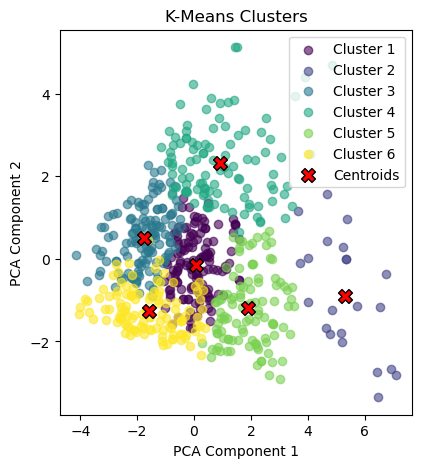

In [66]:
# Set the number of clusters for K-means
k = int(number_of_bins)
y_bins = np.array(cleaned_meal_bin_indices)

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=k, random_state=123)
y_kmeans = kmeans.fit_predict(scaled_meal_glucose_features_matrix)

# Get cluster labels and centroids
kmeans_cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_pca_kmeans = pca.fit_transform(scaled_meal_glucose_features_matrix)

# Plotting the clusters found by k-means
plt.figure(figsize=(10, 5))

# Get the viridis color map and extract six colors from it
viridis = get_cmap('viridis', k)
colors = [viridis(i) for i in range(k)]

# Subplot 1: Scatter plot by k-means clusters
plt.subplot(1, 2, 1)
for i in range(k):
    cluster_points = X_pca_kmeans[y_kmeans == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors[i], label=f'Cluster {i + 1}', alpha=0.6, marker='o')

# Plotting the centroids after PCA transformation
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            color='red', edgecolor='black', marker='X', s=100, label='Centroids')

plt.title("K-Means Clusters")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.show()

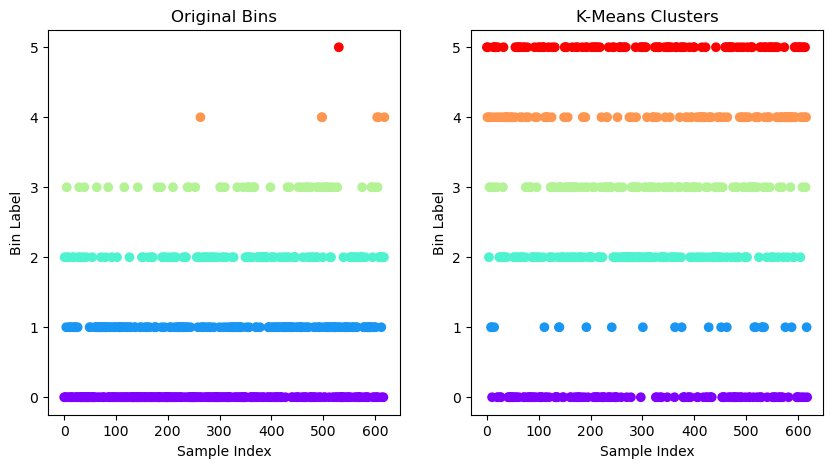

In [67]:
# Set the number of clusters for K-means
k = int(number_of_bins)
y_bins = np.array(cleaned_meal_bin_indices)

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=k, random_state=123)
y_kmeans = kmeans.fit_predict(scaled_meal_glucose_features_matrix)

# Get cluster labels and centroids
kmeans_cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_meal_glucose_features_matrix)

# Plotting the clusters found by k-means
plt.figure(figsize=(10, 5))

# Subplot 1: Scatter plot by original bins
plt.subplot(1, 2, 1)
plt.scatter(
    np.arange(0, y_bins.shape[0]),
    y_bins,
    c=y_bins,
    cmap='rainbow',
    marker='o')
plt.title("Original Bins")
plt.xlabel("Sample Index")
plt.ylabel("Bin Label")

# Subplot 2: Scatter plot by k-means clusters
plt.subplot(1, 2, 2)
plt.scatter(
    np.arange(0, y_kmeans.shape[0]),
    y_kmeans,
    c=y_kmeans,
    cmap='rainbow',
    marker='o')
plt.title("K-Means Clusters")
plt.xlabel("Sample Index")
plt.ylabel("Bin Label")

plt.show()

### Compute K-Means SSE

In [68]:
#| label: CSE572_Code_5
# Compute SSE
SSE_kmeans = np.float64(kmeans.inertia_)
SSE_kmeans

np.float64(1840.9904638055532)

### DBSCAN Clustering

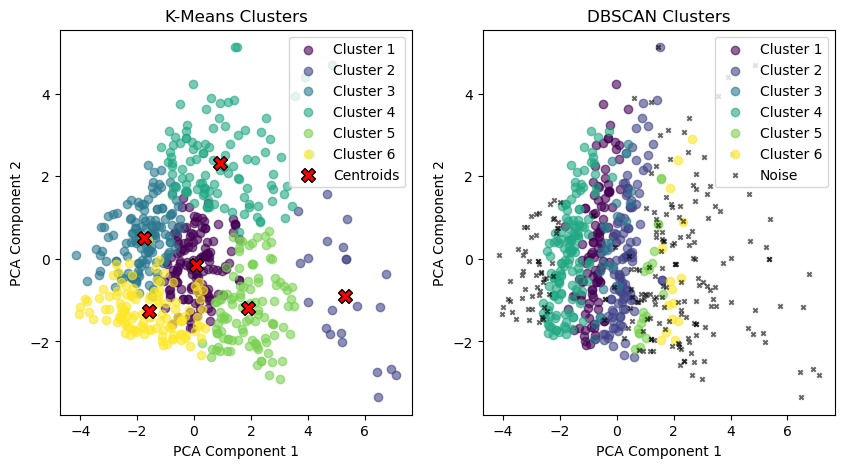

In [69]:
# Set the number of clusters for K-means
k = int(number_of_bins)
y_bins = np.array(cleaned_meal_bin_indices)

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=k, random_state=123)
y_kmeans = kmeans.fit_predict(scaled_meal_glucose_features_matrix)

# Get cluster labels and centroids
kmeans_cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_meal_glucose_features_matrix)

# Plotting the clusters found by k-means
plt.figure(figsize=(10, 5))

# Get the viridis color map and extract six colors from it
viridis = get_cmap('viridis', k)
colors = [viridis(i) for i in range(k)]

# Subplot 1: Scatter plot by k-means clusters
plt.subplot(1, 2, 1)
for i in range(k):
    cluster_points = X_pca[y_kmeans == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                color=colors[i], label=f'Cluster {i + 1}', alpha=0.6, marker='o')

# Plotting the centroids after PCA transformation
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            color='red', edgecolor='black', marker='X', s=100, label='Centroids')

plt.title("K-Means Clusters")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

# Get axis limits to keep the same scale for the second plot
x_lim = plt.xlim()
y_lim = plt.ylim()

# Subplot 2: Scatter plot by DBSCAN clusters
plt.subplot(1, 2, 2)

eps = 280  # Maximum distance between two points to be considered neighbors
min_samples = 15  # Minimum number of points in a neighborhood to form a dense region

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y_dbscan = dbscan.fit_predict(meal_glucose_features_matrix)

# Create a color palette for the clusters found by DBSCAN, including noise (-1) as black
unique_labels = set(y_dbscan)
dbscan_colors = [plt.cm.viridis(float(i) / (max(unique_labels) if max(unique_labels) > 0 else 1))
                 for i in unique_labels]

# Color each point by DBSCAN cluster, use black for noise points
for label in unique_labels:
    if label == -1:
        # Noise points are labeled as -1
        plt.scatter(X_pca[y_dbscan == label, 0], X_pca[y_dbscan == label, 1], 
                    color='black', s=10, label='Noise', alpha=0.6, marker='x')
    else:
        plt.scatter(X_pca[y_dbscan == label, 0], X_pca[y_dbscan == label, 1], 
                    color=dbscan_colors[label], label=f'Cluster {label + 1}', alpha=0.6, marker='o')

plt.title("DBSCAN Clusters")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.xlim(x_lim)  # Apply same x-axis limits as K-means plot
plt.ylim(y_lim)  # Apply same y-axis limits as K-means plot
plt.legend()

plt.show()

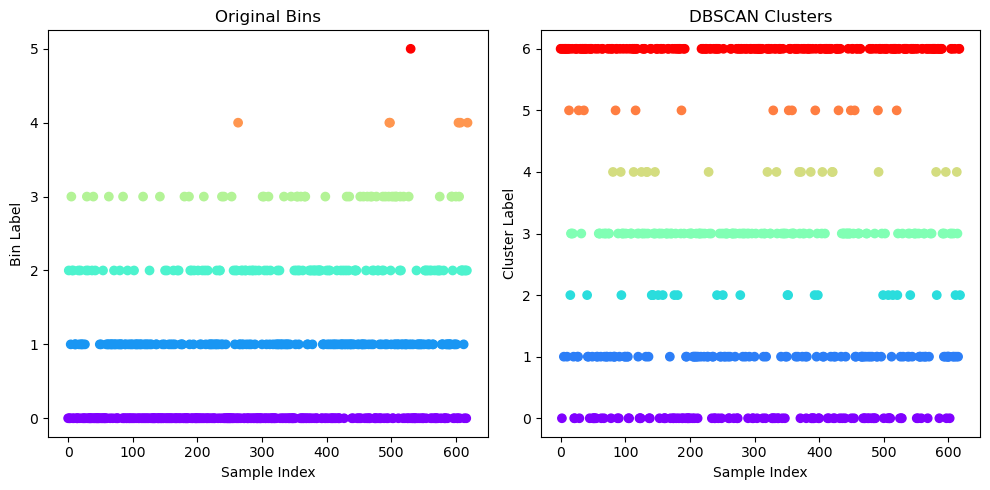

In [70]:
y_bins = np.array(cleaned_meal_bin_indices)

# DBSCAN Parameters
eps = 280  # Maximum distance between two points to be considered neighbors
min_samples = 15  # Minimum number of points in a neighborhood to form a dense region

# Fit DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
y_dbscan = dbscan.fit_predict(meal_glucose_features_matrix)

# Adjust labels to start from 0 (handle noise points separately)
# Noise points are marked as -1, so we'll make their label `max_label + 1`
adjusted_y_dbscan = y_dbscan.copy()
max_label = y_dbscan.max()

# Replace all noise labels (-1) with a new label which is `max_label + 1`
adjusted_y_dbscan[adjusted_y_dbscan == -1] = max_label + 1

# Plotting the clusters found by DBSCAN and original bins
plt.figure(figsize=(10, 5))

# Subplot 1: Scatter plot by original bins
plt.subplot(1, 2, 1)
plt.scatter(
    np.arange(0, y_bins.shape[0]),
    y_bins,
    c=y_bins,
    cmap='rainbow',
    marker='o')
plt.title("Original Bins")
plt.xlabel("Sample Index")
plt.ylabel("Bin Label")

# Subplot 2: Scatter plot by DBSCAN clusters
plt.subplot(1, 2, 2)
plt.scatter(
    np.arange(0, adjusted_y_dbscan.shape[0]),
    adjusted_y_dbscan,
    c=adjusted_y_dbscan,
    cmap='rainbow',
    marker='o')
plt.title("DBSCAN Clusters")
plt.xlabel("Sample Index")
plt.ylabel("Cluster Label")

plt.tight_layout()
plt.show()


### Compute DBSCAN SSE

In [ ]:
#| label: CSE572_Code_6
# Get unique clusters excluding noise (-1)
unique_clusters = set(y_dbscan) - {-1}

# Initialize SSE
SSE_dbscan = 0

# Loop over each cluster to compute SSE
for cluster in unique_clusters:
    # Get points in the current cluster
    cluster_points = meal_glucose_features_matrix[y_dbscan == cluster]
    
    # Compute the pseudo-centroid (mean of points in the cluster)
    pseudo_centroid = np.mean(cluster_points, axis=0)
    
    # Compute SSE for this cluster
    sse_cluster = np.sum((cluster_points - pseudo_centroid) ** 2)
    
    # Add the cluster's SSE to the total SSE
    SSE_dbscan += sse_cluster

print(f"Approximate SSE for DBSCAN (excluding noise): {SSE_dbscan}")

Approximate SSE for DBSCAN (excluding noise): 365871520.5756363


## Compute Entropy and Purity

### K Means Cluster Bin Matrix

In [72]:
df_kmeans_cluster = \
    pd.DataFrame(
        {'Cluster': kmeans_cluster_labels,
         'Bin': np.array(cleaned_meal_bin_indices)}
    )
df_kmeans_cluster

,Cluster,Bin
0,5,0
1,4,2
2,5,0
3,4,0
4,2,1
...,...,...
614,5,2
615,3,2
616,4,0
617,1,2


In [73]:
df_kmeans_cluster_bin_matrix = \
    pd.crosstab(
        df_kmeans_cluster['Cluster'], 
        df_kmeans_cluster['Bin'])
df_kmeans_cluster_bin_matrix

Bin,0,1,2,3,4,5
Cluster,,,,,,
0,58,46,18,8,2,1
1,7,5,5,5,0,0
2,72,36,17,9,1,0
3,41,30,24,11,0,0
4,40,39,19,7,1,0
5,56,27,25,7,2,0


### DBSCAN Cluster Bin Matrix

In [74]:
#y_dbscan

In [75]:
df_dbscan_cluster = \
    pd.DataFrame(
        {'Cluster': y_dbscan,
         'Bin': np.array(cleaned_meal_bin_indices)}
    )

df_dbscan_cluster = \
    df_dbscan_cluster[df_dbscan_cluster['Cluster'] != -1]
df_dbscan_cluster

,Cluster,Bin
2,0,0
5,1,3
10,1,1
13,5,0
15,2,0
...,...,...
612,1,1
613,4,0
614,3,2
615,1,2


In [76]:
df_dbscan_cluster_bin_matrix = \
    pd.crosstab(
        df_dbscan_cluster['Cluster'], 
        df_dbscan_cluster['Bin'])
df_dbscan_cluster_bin_matrix

Bin,0,1,2,3,4,5
Cluster,,,,,,
0,41,37,19,9,0,0
1,43,35,19,7,1,1
2,16,2,2,4,1,0
3,65,35,24,6,1,0
4,10,6,3,1,0,0
5,3,4,4,4,0,0


### Define Entropy Function

In [77]:
def entropy(entries):
    entries = entries[entries > 0]
    return -np.sum(entries * np.log2(entries))

### Calculate K Means Row Entropy Values

In [78]:
k_means_entropy_values = \
    df_kmeans_cluster_bin_matrix.apply(lambda row: entropy(row / row.sum()), axis=1)
k_means_entropy_values

Cluster
0    1.830430
1    1.983050
2    1.681496
3    1.869815
4    1.828204
5    1.816162
dtype: float64

### Calculate DBSCAN Row Entropy Values

In [79]:
dbscan_entropy_values = \
    df_dbscan_cluster_bin_matrix.apply(lambda row: entropy(row / row.sum()), axis=1)
dbscan_entropy_values

Cluster
0    1.806700
1    1.886256
2    1.603856
3    1.716418
4    1.647731
5    1.989898
dtype: float64

### Calculate Total Entropy

#### Calculate K Means Cluster Sizes

In [80]:
k_means_cluster_sizes = df_kmeans_cluster_bin_matrix.sum(axis=1)
k_means_cluster_sizes

Cluster
0    133
1     22
2    135
3    106
4    106
5    117
dtype: int64

#### Calculate DBSCAN Cluster Sizes

In [81]:
dbscan_cluster_sizes = df_dbscan_cluster_bin_matrix.sum(axis=1)
dbscan_cluster_sizes

Cluster
0    106
1    106
2     25
3    131
4     20
5     15
dtype: int64

#### Total Data Points

In [82]:
total_data_points = len(meal_glucose_features_matrix)
total_data_points

619

### K-Means Total Entropy

In [ ]:
#| label: CSE572_Code_7
k_means_total_entropy = \
    np.sum(k_means_cluster_sizes * k_means_entropy_values) / total_data_points
k_means_total_entropy

np.float64(1.807039149934111)

### DBSCAN Total Entropy

In [ ]:
#| label: CSE572_Code_8
dbscan_total_entropy = \
    np.sum(dbscan_cluster_sizes * dbscan_entropy_values) / total_data_points
dbscan_total_entropy

np.float64(1.161879812576486)

### Calculate Total Purity

#### Calculate K Means Purity Values

In [85]:
k_means_purity_values = \
    df_kmeans_cluster_bin_matrix.apply(lambda row: row.max() / row.sum(), axis=1)
k_means_purity_values

Cluster
0    0.436090
1    0.318182
2    0.533333
3    0.386792
4    0.377358
5    0.478632
dtype: float64

#### Calculate DBSCAN Purity Values

In [86]:
dbscan_purity_values = \
    df_dbscan_cluster_bin_matrix.apply(lambda row: row.max() / row.sum(), axis=1)
dbscan_purity_values

Cluster
0    0.386792
1    0.405660
2    0.640000
3    0.496183
4    0.500000
5    0.266667
dtype: float64

### K-Means Total Purity

In [ ]:
#| label: CSE572_Code_9
k_means_total_purity = \
    np.sum(k_means_cluster_sizes * k_means_purity_values) / total_data_points
k_means_total_purity

np.float64(0.44264943457189015)

### DBSCAN Total Purity

In [ ]:
#| label: CSE572_Code_10
dbscan_total_purity = \
    np.sum(dbscan_cluster_sizes * dbscan_purity_values) / total_data_points
dbscan_total_purity

np.float64(0.28917609046849757)

## Create Results File

In [89]:
results = [
    SSE_kmeans,
    SSE_dbscan,
    k_means_total_entropy,
    dbscan_total_entropy,
    k_means_total_purity,
    dbscan_total_purity
]
results

[np.float64(1840.9904638055532),
 np.float64(365871520.5756363),
 np.float64(1.807039149934111),
 np.float64(1.161879812576486),
 np.float64(0.44264943457189015),
 np.float64(0.28917609046849757)]

In [90]:
results_matrix_1x6 = np.array(results).reshape(1, 6)
results_matrix_1x6

array([[1.84099046e+03, 3.65871521e+08, 1.80703915e+00, 1.16187981e+00,
        4.42649435e-01, 2.89176090e-01]])

In [91]:
np.savetxt('Result.csv', results_matrix_1x6, delimiter=',', fmt='%10.5f')